In [1]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
f = open("../data/data.txt", "r")
data = f.read()
f.close()

In [3]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [4]:
df = pd.DataFrame([remove_punctuation(line) for line in data.split("\n") if line])
df.columns = ["lines"]

In [5]:
df

,lines
0,Switzerland is home to seemingly endless natur...
1,Lake Geneva
2,One of the largest lakes in Western Europe Lak...
3,The Lion of Lucerne
4,In 1792 members of the Swiss Guard were massac...
...,...
1498,lausanne places to visit in switzerland
1499,50 Visit picturesque Albogasio
1500,While this picturesque village is technically ...
1501,things to do in switzerland


In [6]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['lines']=df['lines'].apply(lambda x: tokenize(x.lower()))
df.head()

,lines
0,"[switzerland, is, home, to, seemingly, endless..."
1,"[lake, geneva]"
2,"[one, of, the, largest, lakes, in, western, eu..."
3,"[the, lion, of, lucerne]"
4,"[in, 1792, members, of, the, swiss, guard, wer..."


In [7]:
stopword = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
def remove_stopwords_plus_stem(text):
    text=[ps.stem(word) for word in text if word not in stopword]
    return text
df['lines'] = df['lines'].apply(lambda x: remove_stopwords_plus_stem(x))
df.head()

,lines
0,"[switzerland, home, seemingli, endless, natur,..."
1,"[lake, geneva]"
2,"[one, largest, lake, western, europ, lake, gen..."
3,"[lion, lucern]"
4,"[1792, member, swiss, guard, massacr, french, ..."


In [13]:
from collections import defaultdict
word_count = defaultdict(int)

def count_words(text):
    for word in text:
        word_count[word]+=1
    return None

df["lines"].apply(lambda x: count_words(x))
word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}
word_count_df = pd.DataFrame(word_count, index=["count"]).transpose().head(50)
word_count_df

,count
,408
switzerland,312
lake,163
one,151
swiss,147
citi,117
mountain,117
town,108
take,106
visit,101


In [78]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='fr-FR', tz=360)

In [79]:
kw_list = ["swiss " + word for word in list(word_count_df.index[5:10])]
kw_list = ["Hotel Suisse"]

In [80]:
dfs = {}
countries = ["US", "FR", "DE", "JP", "CH"]
for country in countries:
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo=country, gprop='')
    dfs[country] = pytrends.interest_over_time()

In [81]:
dfs["US"]

,Hotel Suisse,isPartial
date,,
2015-12-13,21,False
2015-12-20,24,False
2015-12-27,33,False
2016-01-03,52,False
2016-01-10,17,False
...,...,...
2020-11-08,35,False
2020-11-15,44,False
2020-11-22,30,False


In [82]:
import matplotlib.pyplot as plt

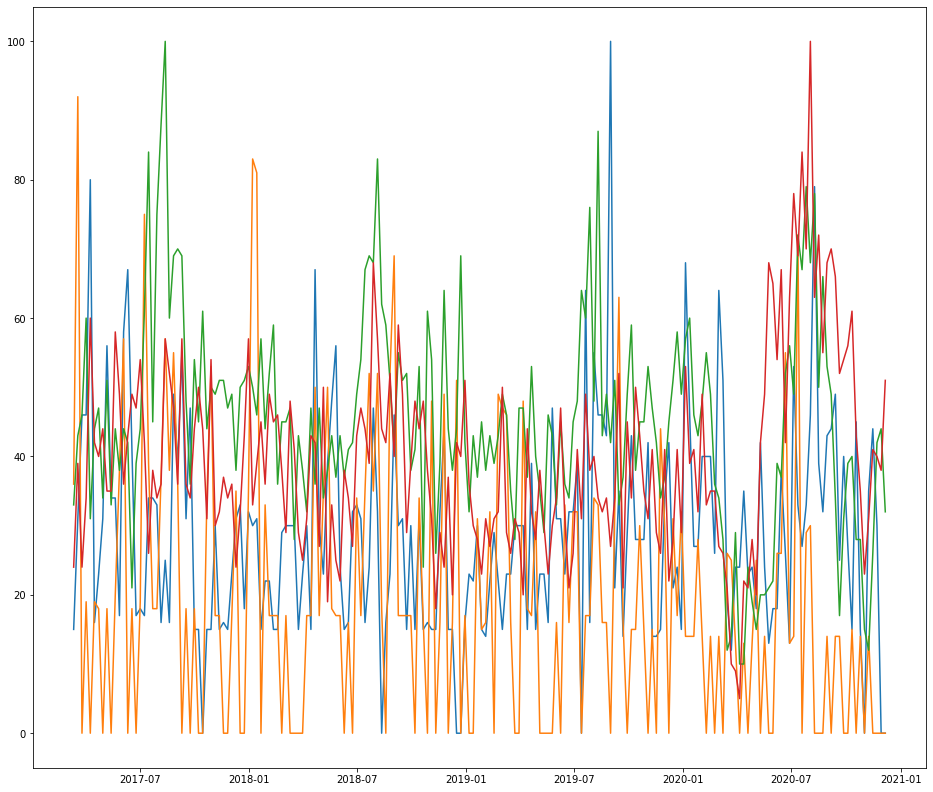

In [83]:
fig = plt.figure(figsize=(16,14))
plt.plot(dfs["US"].index[-196:], dfs["US"][kw_list[0]][-196:])
plt.plot(dfs["DE"].index[-196:], dfs["DE"][kw_list[0]][-196:])
plt.plot(dfs["FR"].index[-196:], dfs["FR"][kw_list[0]][-196:])
plt.plot(dfs["CH"].index[-196:], dfs["CH"][kw_list[0]][-196:])
plt.show()
#plt.plot(dfs["DE"]["swiss mountain"])